In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
path1 = './data/new점포-상권.csv'
path2 = './data/new점포-행정동.csv'

temp1 = pd.read_csv(path1, encoding='cp949')
temp2 = pd.read_csv(path2, encoding='cp949')

# temp1(점포-상권) 정보 확인

In [12]:
print(temp1.shape)
temp1.info()

(3113, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년분기_코드    3113 non-null   int64 
 1   상권_구분_코드     3113 non-null   object
 2   상권_구분_코드_명   3113 non-null   object
 3   상권_코드        3113 non-null   int64 
 4   상권_코드_명      3113 non-null   object
 5   서비스_업종_코드    3113 non-null   object
 6   서비스_업종_코드_명  3113 non-null   object
 7   점포_수         3113 non-null   int64 
 8   유사_업종_점포_수   3113 non-null   int64 
 9   개업_율         3113 non-null   int64 
 10  개업_점포_수      3113 non-null   int64 
 11  폐업_률         3113 non-null   int64 
 12  폐업_점포_수      3113 non-null   int64 
 13  프랜차이즈_점포_수   3113 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 340.6+ KB


In [13]:
temp1.describe()

,기준_년분기_코드,상권_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
count,3113.000000,3.113000e+03,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000
mean,20232.502409,3.115645e+06,13.329586,15.869258,3.857372,0.635400,3.840026,0.618696,2.539672
std,1.118929,1.362236e+04,28.084441,31.520782,11.260908,1.598037,10.752658,1.473239,5.260787
min,20231.000000,3.001496e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20232.000000,3.110980e+06,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20233.000000,3.120191e+06,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,20234.000000,3.120210e+06,12.000000,15.000000,3.000000,1.000000,3.000000,1.000000,3.000000
max,20234.000000,3.130310e+06,363.000000,403.000000,100.000000,23.000000,100.000000,23.000000,49.000000


In [21]:
temp1.columns

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률',
       '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

In [53]:
temp1.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100001,한식음식점,45,55,2,1,4,2,10
1,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100002,중식음식점,10,11,0,0,18,2,1
2,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100003,일식음식점,18,24,0,0,0,0,6
3,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100004,양식음식점,32,37,0,0,0,0,5
4,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100005,제과점,11,17,0,0,6,1,6


In [97]:
# 이상치라고 봐도 될까?
# 왜냐면 유사업종점포수는 점포수 + 프랜차이즈점포수 이기 때문에
# 폐업점포수가 있으면 전분기에 점포가 있었나 알아봐야할 것 같음.
# 개업점포수가 있다면 다음 분기에 그 점포가 있나 봐야할 것 같음.
print(temp1[temp1['유사_업종_점포_수'] == 0].shape)
temp1.query('유사_업종_점포_수 == 0')

(18, 14)


,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
98,20231,A,골목상권,3110962,도산공원북측,CS100009,호프-간이주점,0,0,0,0,0,1,0
113,20231,A,골목상권,3110965,언주역 6번,CS100005,제과점,0,0,0,0,0,1,0
257,20231,A,골목상권,3110990,청담역 12번,CS100001,한식음식점,0,0,0,0,0,1,0
648,20231,D,발달상권,3120216,경기고교사거리(경기고교앞사거리),CS100009,호프-간이주점,0,0,0,0,0,1,0
791,20232,A,골목상권,3110949,한남IC,CS100006,패스트푸드점,0,0,0,0,0,1,0
924,20232,A,골목상권,3110971,선정릉역 4번,CS100002,중식음식점,0,0,0,0,0,1,0
942,20232,A,골목상권,3110974,언주중학교,CS100001,한식음식점,0,0,0,0,0,1,0
958,20232,A,골목상권,3110978,도곡2동주민센터(대치중학교),CS100001,한식음식점,0,0,0,0,0,1,0
1512,20232,R,전통시장,3130303,영동전통시장,CS100005,제과점,0,0,0,0,0,1,0
1569,20233,A,골목상권,3110949,한남IC,CS100009,호프-간이주점,0,0,0,0,0,1,0


In [109]:
# 유사업종점포수가 0이 아닌 경우
jp_sg_raw = temp1.query('유사_업종_점포_수 != 0').reset_index(drop=True)
jp_sg_raw.head(3)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100001,한식음식점,45,55,2,1,4,2,10
1,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100002,중식음식점,10,11,0,0,18,2,1
2,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100003,일식음식점,18,24,0,0,0,0,6


In [106]:
# 전처리한 것 중 점포수가 0인 데이터 확인 (그 상권에 프랜차이즈만 존재)
jp_sg_raw.query('점포_수 == 0').head(3) # 141

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
50,20231,A,골목상권,3110955,논현초등학교,CS100007,치킨전문점,0,2,0,0,0,0,2
60,20231,A,골목상권,3110956,언주역 8번,CS100010,커피-음료,0,1,100,1,0,0,1
114,20231,A,골목상권,3110965,언주역 6번,CS100009,호프-간이주점,0,1,0,0,0,0,1


In [108]:
# 개업율이나 폐업률이 100인 자료 찾기
jp_sg_raw.query('개업_율 == 100 | 폐업_률 == 100').head(3)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
60,20231,A,골목상권,3110956,언주역 8번,CS100010,커피-음료,0,1,100,1,0,0,1
193,20231,A,골목상권,3110980,개포지구대옆,CS100007,치킨전문점,1,1,0,0,100,1,0
233,20231,A,골목상권,3110986,삼성중앙역 7번,CS100008,분식전문점,1,1,100,1,100,1,0


In [118]:
jp_sg = jp_sg_raw.copy()

In [119]:
# 개업율, 폐업률 제거하기
jp_sg = jp_sg.drop(['개업_율', '폐업_률'], axis=1)
jp_sg.head(3)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
0,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100001,한식음식점,45,55,1,2,10
1,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100002,중식음식점,10,11,0,2,1
2,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100003,일식음식점,18,24,0,0,6


In [120]:
# 기준_년분기_코드, 상권_코드를 문자로 바꾸기
jp_sg[['기준_년분기_코드', '상권_코드']] = jp_sg[['기준_년분기_코드', '상권_코드']].astype(str)
jp_sg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년분기_코드    3095 non-null   object
 1   상권_구분_코드     3095 non-null   object
 2   상권_구분_코드_명   3095 non-null   object
 3   상권_코드        3095 non-null   object
 4   상권_코드_명      3095 non-null   object
 5   서비스_업종_코드    3095 non-null   object
 6   서비스_업종_코드_명  3095 non-null   object
 7   점포_수         3095 non-null   int64 
 8   유사_업종_점포_수   3095 non-null   int64 
 9   개업_점포_수      3095 non-null   int64 
 10  폐업_점포_수      3095 non-null   int64 
 11  프랜차이즈_점포_수   3095 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 290.3+ KB


In [131]:
# 기준_년분기_코드 바꾸기
jp_sg.replace({'기준_년분기_코드': {'20231':'2023-1'}}, inplace=True)
jp_sg.replace({'기준_년분기_코드': {'20232':'2023-2'}}, inplace=True)
jp_sg.replace({'기준_년분기_코드': {'20233':'2023-3'}}, inplace=True)
jp_sg.replace({'기준_년분기_코드': {'20234':'2023-4'}}, inplace=True)
jp_sg['기준_년분기_코드'].unique()

array(['2023-1', '2023-2', '2023-3', '2023-4'], dtype=object)

In [144]:
# 총 유사업종점포수
print(jp_sg['유사_업종_점포_수'].sum())
# 유사업종점포수 확인
jp_sg['유사_업종_점포_수'].describe()

49401


count    3095.000000
mean       15.961551
std        31.589022
min         1.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       403.000000
Name: 유사_업종_점포_수, dtype: float64

In [145]:
# 총 점포수
print(jp_sg['점포_수'].sum())
# 점포수 확인
jp_sg['점포_수'].describe()

41495


count    3095.000000
mean       13.407108
std        28.147553
min         0.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       363.000000
Name: 점포_수, dtype: float64

In [146]:
# 총 프랜차이즈 점포수
print(jp_sg['프랜차이즈_점포_수'].sum())
# 프랜차이즈 수 확인
jp_sg['프랜차이즈_점포_수'].describe()

7906


count    3095.000000
mean        2.554443
std         5.272490
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        49.000000
Name: 프랜차이즈_점포_수, dtype: float64

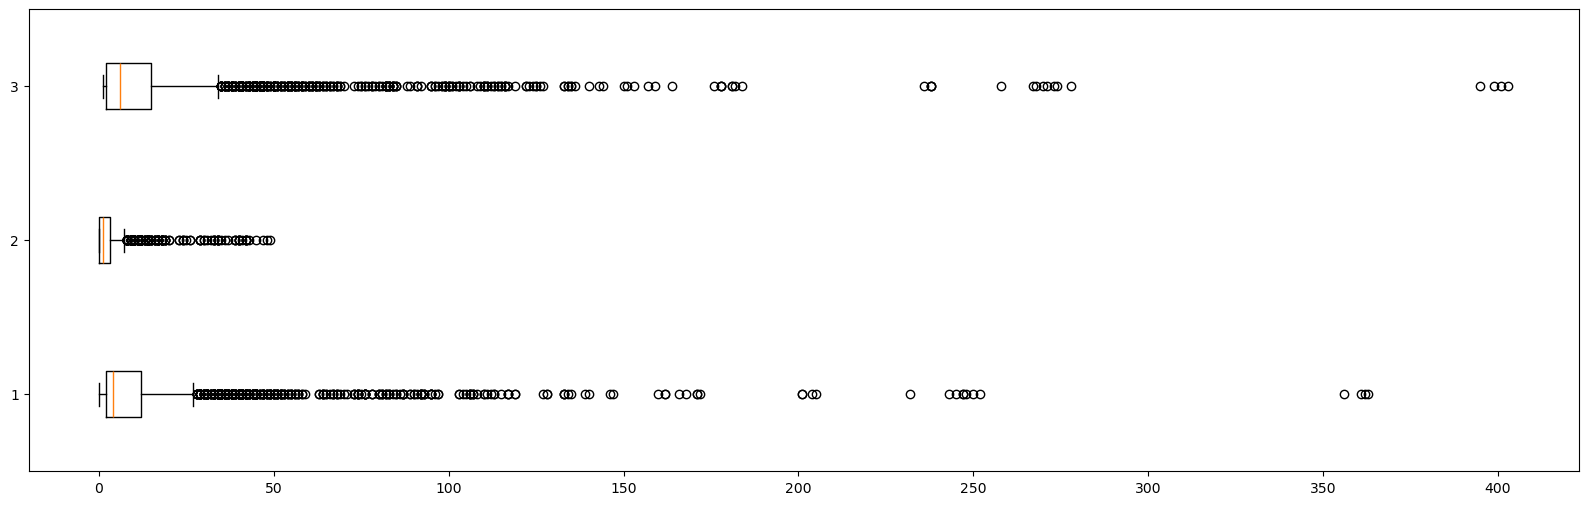

In [148]:
# boxplot 만들어보기
# 그래프 바탕 만들기
fig, ax = plt.subplots(figsize=(20, 6))

ax.boxplot([jp_sg['점포_수'], jp_sg['프랜차이즈_점포_수'], jp_sg['유사_업종_점포_수']], vert=False)

# 그래프 보여주기
plt.show()

In [150]:
# 총 개업 점포수
print(jp_sg['개업_점포_수'].sum())
# 개업 점포수
jp_sg['개업_점포_수'].describe()

1977


count    3095.000000
mean        0.638772
std         1.601969
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        23.000000
Name: 개업_점포_수, dtype: float64

In [151]:
# 총 폐업 점포수
print(jp_sg['폐업_점포_수'].sum())
# 개업 점포수
jp_sg['폐업_점포_수'].describe()

1909


count    3095.000000
mean        0.616801
std         1.477205
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        23.000000
Name: 폐업_점포_수, dtype: float64

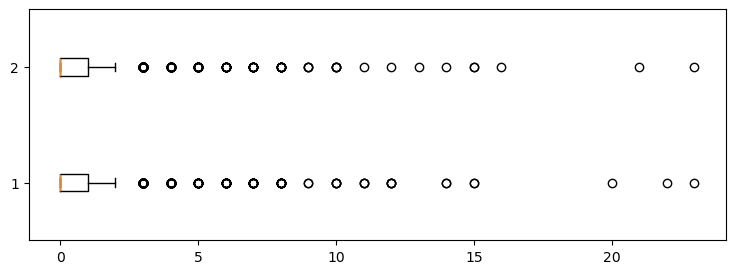

In [154]:
# 개업, 폐업 boxplot
fig, ax = plt.subplots(figsize=(9, 3))

ax.boxplot([jp_sg['개업_점포_수'], jp_sg['폐업_점포_수']], vert=False)

plt.show()

## 변수 간의 관계 확인

In [155]:
# 분기별 점포수 확인
jp_sg.groupby('기준_년분기_코드')[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
기준_년분기_코드,,,
2023-1,10291,1998,12289
2023-2,10383,1987,12370
2023-3,10370,1968,12338
2023-4,10451,1953,12404


In [157]:
# 상권구분별 점포수 확인
jp_sg.groupby(['상권_구분_코드', '상권_구분_코드_명'])[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
상권_구분_코드,상권_구분_코드_명,,,
A,골목상권,4750,657,5407
D,발달상권,34785,6722,41507
R,전통시장,1292,209,1501
U,관광특구,668,318,986


In [156]:
# 상권별 점포수 확인
jp_sg.groupby(['상권_코드', '상권_코드_명'])[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
상권_코드,상권_코드_명,,,
3001496,강남 마이스 관광특구,668,318,986
3110949,한남IC,134,0,134
3110950,논현역 7번,15,0,15
3110951,신사은행나무공원,113,0,113
3110952,논현목련공원,43,0,43
...,...,...,...,...
3130306,강남언주로,370,24,394
3130307,도곡시장,13,11,24
3130308,청담삼익시장,56,0,56


In [158]:
# 서비스 업종별 점포수 확인
jp_sg.groupby(['서비스_업종_코드', '서비스_업종_코드_명'])[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
서비스_업종_코드,서비스_업종_코드_명,,,
CS100001,한식음식점,16411,1656,18067
CS100002,중식음식점,1611,97,1708
CS100003,일식음식점,3201,297,3498
CS100004,양식음식점,5000,345,5345
CS100005,제과점,1206,503,1709
CS100006,패스트푸드점,1288,760,2048
CS100007,치킨전문점,400,734,1134
CS100008,분식전문점,4214,609,4823
CS100009,호프-간이주점,1836,315,2151


In [159]:
# 분기별 상권구분별 점포수 확인
jp_sg.groupby(['기준_년분기_코드', '상권_구분_코드_명'])[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

점포_수  프랜차이즈_점포_수  유사_업종_점포_수
기준_년분기_코드 상권_구분_코드_명                              
2023-1    골목상권        1191         166        1357
          관광특구         169          81         250
          발달상권        8630        1701       10331
          전통시장         301          50         351
2023-2    골목상권        1190         165        1355
          관광특구         171          80         251
          발달상권        8724        1689       10413
          전통시장         298          53         351
2023-3    골목상권        1181         166        1347
          관광특구         163          78         241
          발달상권        8684        1672       10356
          전통시장         342          52         394
2023-4    골목상권        1188         160        1348
          관광특구         165          79         244
          발달상권        8747        1660       10407
          전통시장         351          54         405

In [160]:
# 분기별 상권별 점포수 확인
jp_sg.groupby(['기준_년분기_코드', '상권_코드_명'])[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

점포_수  프랜차이즈_점포_수  유사_업종_점포_수
기준_년분기_코드 상권_코드_명                                          
2023-1    가로수길                  436          53         489
          강남 마이스 관광특구           169          81         250
          강남개포시장                 59          27          86
          강남구보훈회관                 4           1           5
          강남구청(청담역_8번, 강남세무서)    77          20          97
...                             ...         ...         ...
2023-4    학동초등학교                  9           1          10
          한국교통안전공단 강남자동차검사소       6           0           6
          한남IC                   35           0          35
          한티역                   123          53         176
          휘문고교사거리                25           5          30

[408 rows x 3 columns]

In [161]:
# 분기별 서비스 업종별 점포수 확인
jp_sg.groupby(['기준_년분기_코드', '서비스_업종_코드_명'])[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

점포_수  프랜차이즈_점포_수  유사_업종_점포_수
기준_년분기_코드 서비스_업종_코드_명                              
2023-1    분식전문점        1012         155        1167
          양식음식점        1248          86        1334
          일식음식점         778          77         855
          제과점           306         125         431
          중식음식점         395          25         420
          치킨전문점         102         186         288
          커피-음료        1539         639        2178
          패스트푸드점        332         198         530
          한식음식점        4103         436        4539
          호프-간이주점       476          71         547
2023-2    분식전문점        1045         154        1199
          양식음식점        1257          87        1344
          일식음식점         793          75         868
          제과점           304         127         431
          중식음식점         400          26         426
          치킨전문점         100         182         282
          커피-음료        1569         651        2220
          패스트푸드점        326         191         517
          한식음식점        4129         414        4543
          호프-간이주점       460          80         540
2023-3    분식전문점        1068         150        1218
          양식음식점        1248          86        1334
          일식음식점         807          73         880
          제과점           293         128         421
          중식음식점         406          24         430
          치킨전문점         100         182         282
          커피-음료        1597         647        2244
          패스트푸드점        313         188         501
          한식음식점        4085         408        4493
          호프-간이주점       453          82         535
2023-4    분식전문점        1089         150        1239
          양식음식점        1247          86        1333
          일식음식점         823          72         895
          제과점           303         123         426
          중식음식점         410          22         432
          치킨전문점          98         184         282
          커피-음료        1623         653        2276
          패스트푸드점        317         183         500
          한식음식점        4094         398        4492
          호프-간이주점       447          82         529

In [162]:
# 상권구분별 서비스 업종별 점포수 확인
jp_sg.groupby(['상권_구분_코드_명', '서비스_업종_코드_명'])[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

점포_수  프랜차이즈_점포_수  유사_업종_점포_수
상권_구분_코드_명 서비스_업종_코드_명                               
골목상권       분식전문점          437          32         469
           양식음식점          461          20         481
           일식음식점          274          16         290
           제과점            187          35         222
           중식음식점          149          10         159
           치킨전문점           94         138         232
           커피-음료         1048         123        1171
           패스트푸드점         174         112         286
           한식음식점         1799         129        1928
           호프-간이주점        127          42         169
관광특구       분식전문점           90          28         118
           양식음식점          126          17         143
           일식음식점           62          24          86
           제과점             43          25          68
           중식음식점           40           4          44
           치킨전문점            8           0           8
           커피-음료           82         134         216
           패스트푸드점          37          48          85
           한식음식점          180          38         218
발달상권       분식전문점         3543         523        4066
           양식음식점         4332         300        4632
           일식음식점         2769         250        3019
           제과점            950         432        1382
           중식음식점         1394          75        1469
           치킨전문점          271         574         845
           커피-음료         5104        2299        7403
           패스트푸드점        1064         584        1648
           한식음식점        13736        1425       15161
           호프-간이주점       1622         260        1882
전통시장       분식전문점          144          26         170
           양식음식점           81           8          89
           일식음식점           96           7         103
           제과점             26          11          37
           중식음식점           28           8          36
           치킨전문점           27          22          49
           커피-음료           94          34         128
           패스트푸드점          13          16          29
           한식음식점          696          64         760
           호프-간이주점         87          13         100

In [163]:
# 상권별 서비스 업종별 점포수 확인
jp_sg.groupby(['상권_코드_명', '서비스_업종_코드_명'])[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

점포_수  프랜차이즈_점포_수  유사_업종_점포_수
상권_코드_명 서비스_업종_코드_명                              
가로수길    분식전문점         140          20         160
        양식음식점         356          16         372
        일식음식점         195          19         214
        제과점           104           8         112
        중식음식점          39           0          39
...                   ...         ...         ...
휘문고교사거리 제과점             0           4           4
        중식음식점           4           0           4
        커피-음료          26          10          36
        패스트푸드점          4           4           8
        한식음식점          29           0          29

[791 rows x 3 columns]

In [ ]:
# 상권_코드_명을 분류를 해주는게 좋을 듯
# ex) ~길, 학교 근처 등

In [165]:
# 분기별 개업, 폐업수 확인
jp_sg.groupby('기준_년분기_코드')[['개업_점포_수', '폐업_점포_수']].sum()

,개업_점포_수,폐업_점포_수
기준_년분기_코드,,
2023-1,437,479
2023-2,554,460
2023-3,470,517
2023-4,516,453


In [166]:
# 상권구분별 개업, 폐업수 확인
jp_sg.groupby(['상권_구분_코드', '상권_구분_코드_명'])[['개업_점포_수', '폐업_점포_수']].sum()

,,개업_점포_수,폐업_점포_수
상권_구분_코드,상권_구분_코드_명,,
A,골목상권,256,246
D,발달상권,1641,1592
R,전통시장,65,50
U,관광특구,15,21


In [167]:
# 상권별 개업, 폐업수 확인
jp_sg.groupby(['상권_코드', '상권_코드_명'])[['개업_점포_수', '폐업_점포_수']].sum()

,,개업_점포_수,폐업_점포_수
상권_코드,상권_코드_명,,
3001496,강남 마이스 관광특구,15,21
3110949,한남IC,7,2
3110950,논현역 7번,0,0
3110951,신사은행나무공원,3,2
3110952,논현목련공원,9,2
...,...,...,...
3130306,강남언주로,10,12
3130307,도곡시장,2,0
3130308,청담삼익시장,1,0


In [168]:
# 서비스별 개업, 폐업수 확인
jp_sg.groupby(['서비스_업종_코드', '서비스_업종_코드_명'])[['개업_점포_수', '폐업_점포_수']].sum()

,,개업_점포_수,폐업_점포_수
서비스_업종_코드,서비스_업종_코드_명,,
CS100001,한식음식점,687,738
CS100002,중식음식점,79,67
CS100003,일식음식점,155,121
CS100004,양식음식점,197,205
CS100005,제과점,62,56
CS100006,패스트푸드점,67,94
CS100007,치킨전문점,33,44
CS100008,분식전문점,262,195
CS100009,호프-간이주점,43,73


In [170]:
# 분기별 상권구분별 개, 폐업수 확인
jp_sg.groupby(['기준_년분기_코드', '상권_구분_코드_명'])[['개업_점포_수', '폐업_점포_수']].sum()
# 시간 순으로 상권구분별 개업, 폐업 그래프 그려보면 어디가 개업, 폐업이 높고 낮은지 알 수 있을 듯 !

개업_점포_수  폐업_점포_수
기준_년분기_코드 상권_구분_코드_명                  
2023-1    골목상권             63       57
          관광특구              3        6
          발달상권            359      403
          전통시장             12       13
2023-2    골목상권             56       53
          관광특구              6        3
          발달상권            478      392
          전통시장             14       12
2023-3    골목상권             61       65
          관광특구              2       11
          발달상권            392      430
          전통시장             15       11
2023-4    골목상권             76       71
          관광특구              4        1
          발달상권            412      367
          전통시장             24       14

In [171]:
# 분기별 상권별 개, 폐업수 확인
jp_sg.groupby(['기준_년분기_코드', '상권_코드_명'])[['개업_점포_수', '폐업_점포_수']].sum()

개업_점포_수  폐업_점포_수
기준_년분기_코드 상권_코드_명                              
2023-1    가로수길                      16       19
          강남 마이스 관광특구                3        6
          강남개포시장                     4        3
          강남구보훈회관                    0        0
          강남구청(청담역_8번, 강남세무서)        0        3
...                                ...      ...
2023-4    학동초등학교                     1        1
          한국교통안전공단 강남자동차검사소          0        0
          한남IC                       3        0
          한티역                        4        6
          휘문고교사거리                    1        0

[408 rows x 2 columns]

In [174]:
# 분기별 서비스별 개, 폐업수 확인
jp_sg.groupby(['기준_년분기_코드', '서비스_업종_코드_명'])[['개업_점포_수', '폐업_점포_수']].sum()
# 시간순서로 서비스업종별 개, 폐업의 변화 확인 가능

개업_점포_수  폐업_점포_수
기준_년분기_코드 서비스_업종_코드_명                  
2023-1    분식전문점             55       39
          양식음식점             50       60
          일식음식점             26       28
          제과점               12       12
          중식음식점             16       19
          치킨전문점              9       15
          커피-음료             74       78
          패스트푸드점            16       25
          한식음식점            171      192
          호프-간이주점            8       11
2023-2    분식전문점             77       50
          양식음식점             63       48
          일식음식점             46       27
          제과점               17       13
          중식음식점             22       16
          치킨전문점              2        8
          커피-음료            117       78
          패스트푸드점            19       32
          한식음식점            173      166
          호프-간이주점           18       22
2023-3    분식전문점             56       55
          양식음식점             41       55
          일식음식점             43       41
          제과점               16       16
          중식음식점             21       13
          치킨전문점              9        8
          커피-음료             99       89
          패스트푸드점            11       16
          한식음식점            166      200
          호프-간이주점            8       24
2023-4    분식전문점             74       51
          양식음식점             43       42
          일식음식점             40       25
          제과점               17       15
          중식음식점             20       19
          치킨전문점             13       13
          커피-음료            102       71
          패스트푸드점            21       21
          한식음식점            177      180
          호프-간이주점            9       16

In [175]:
# 상권구분별 서비스별 개, 폐업수 확인
jp_sg.groupby(['상권_구분_코드_명', '서비스_업종_코드_명'])[['개업_점포_수', '폐업_점포_수']].sum()

개업_점포_수  폐업_점포_수
상권_구분_코드_명 서비스_업종_코드_명                  
골목상권       분식전문점             27       19
           양식음식점             26       28
           일식음식점             13        8
           제과점                8        5
           중식음식점              9        8
           치킨전문점              8       11
           커피-음료             64       56
           패스트푸드점            10        9
           한식음식점             89      101
           호프-간이주점            2        1
관광특구       분식전문점              2        3
           양식음식점              0        1
           일식음식점              0        3
           제과점                2        3
           중식음식점              0        2
           치킨전문점              0        0
           커피-음료              4        3
           패스트푸드점             5        2
           한식음식점              2        4
발달상권       분식전문점            223      165
           양식음식점            166      174
           일식음식점            136      104
           제과점               52       47
           중식음식점             68       57
           치킨전문점             24       33
           커피-음료            315      250
           패스트푸드점            48       82
           한식음식점            571      612
           호프-간이주점           38       68
전통시장       분식전문점             10        8
           양식음식점              5        2
           일식음식점              6        6
           제과점                0        1
           중식음식점              2        0
           치킨전문점              1        0
           커피-음료              9        7
           패스트푸드점             4        1
           한식음식점             25       21
           호프-간이주점            3        4

In [176]:
# 상권별 서비스별 개, 폐업수 확인
jp_sg.groupby(['상권_코드_명', '서비스_업종_코드_명'])[['개업_점포_수', '폐업_점포_수']].sum()

개업_점포_수  폐업_점포_수
상권_코드_명 서비스_업종_코드_명                  
가로수길    분식전문점             10        9
        양식음식점             14       17
        일식음식점             14        8
        제과점                3        4
        중식음식점              1        3
...                      ...      ...
휘문고교사거리 제과점                0        0
        중식음식점              0        0
        커피-음료              3        1
        패스트푸드점             0        0
        한식음식점              0        0

[791 rows x 2 columns]

### 상권코드 묶기

In [198]:
# 행정동으로 묶기
# 영역-상권.csv 로 코드맞춰서 묶기
raw = pd.read_csv('./data/서울시 상권분석서비스(영역-상권).csv', encoding='cp949')
raw.head(3)

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093,453418,11110,종로구,11110515,청운효자동,149264
1,A,골목상권,3110009,자하문터널,196991,455057,11110,종로구,11110550,부암동,178306
2,A,골목상권,3110010,평창동서측,197064,456643,11110,종로구,11110560,평창동,369415


In [209]:
# 강남구 데이터만 뽑기
# gangnam =
gangnam = raw.query('자치구_코드_명 == "강남구"').reset_index(drop=True)
gangnam.head(3)

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110968,강남구청역 2번,203552,446131,11680,강남구,11680531,논현2동,43750
1,A,골목상권,3110969,베르사이유1아파트,203564,444383,11680,강남구,11680650,역삼2동,55302
2,A,골목상권,3110970,학동초등학교,203644,445789,11680,강남구,11680531,논현2동,50014


In [210]:
# 필요한 컬럼 제외 후 삭제
# 상권_코드, 상권_코드_명, 행정동_코드, 행정동_코드_명
columns = ['상권_코드_명', '행정동_코드', '행정동_코드_명']

gangnam = gangnam[columns]
gangnam

,상권_코드_명,행정동_코드,행정동_코드_명
0,강남구청역 2번,11680531,논현2동
1,베르사이유1아파트,11680650,역삼2동
2,학동초등학교,11680531,논현2동
3,선정릉역 4번,11680640,역삼1동
4,강남세브란스병원미래의학연구센터,11680650,역삼2동
...,...,...,...
98,도곡시장,11680650,역삼2동
99,청담삼익시장,11680565,청담동
100,은마종합상점가,11680610,대치2동
101,강남개포시장,11680670,개포2동


In [218]:
# 점포_상권에 행정동 넣기
gangnam_jp = pd.merge(jp_sg, gangnam, left_on='상권_코드_명', right_on='상권_코드_명', how='left')
gangnam_jp.head(3) # 이렇게 되면 점포-상권 / 행정동 전부 확인 가능함.

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,행정동_코드,행정동_코드_명
0,2023-1,U,관광특구,3001496,강남 마이스 관광특구,CS100001,한식음식점,45,55,1,2,10,11680580,삼성1동
1,2023-1,U,관광특구,3001496,강남 마이스 관광특구,CS100002,중식음식점,10,11,0,2,1,11680580,삼성1동
2,2023-1,U,관광특구,3001496,강남 마이스 관광특구,CS100003,일식음식점,18,24,0,0,6,11680580,삼성1동


In [222]:
gangnam_jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년분기_코드    3095 non-null   object
 1   상권_구분_코드     3095 non-null   object
 2   상권_구분_코드_명   3095 non-null   object
 3   상권_코드        3095 non-null   object
 4   상권_코드_명      3095 non-null   object
 5   서비스_업종_코드    3095 non-null   object
 6   서비스_업종_코드_명  3095 non-null   object
 7   점포_수         3095 non-null   int64 
 8   유사_업종_점포_수   3095 non-null   int64 
 9   개업_점포_수      3095 non-null   int64 
 10  폐업_점포_수      3095 non-null   int64 
 11  프랜차이즈_점포_수   3095 non-null   int64 
 12  행정동_코드       3095 non-null   int64 
 13  행정동_코드_명     3095 non-null   object
dtypes: int64(6), object(8)
memory usage: 338.6+ KB


In [221]:
gangnam_jp.groupby('기준_년분기_코드')[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
기준_년분기_코드,,,
2023-1,10291,1998,12289
2023-2,10383,1987,12370
2023-3,10370,1968,12338
2023-4,10451,1953,12404


In [ ]:
# 특징으로 묶기

In [195]:
jp_sg['상권_코드_명'].unique()

array(['강남 마이스 관광특구', '한남IC', '논현역 7번', '신사은행나무공원', '논현목련공원', '학동근린공원',
       '국기원', '논현초등학교', '언주역 8번', '언북중학교', '역삼역 4번', '신구중학교', '은광여고',
       '언주역 3번', '도산공원북측', '역삼월드메르디앙아파트', '싸리고개근린공원', '언주역 6번',
       '논현2동주민센터', '역삼역 8번', '강남구청역 2번', '베르사이유1아파트', '학동초등학교', '선정릉역 4번',
       '강남세브란스병원미래의학연구센터', '강남구청역 4번', '언주중학교', '매봉역 1번', '언북초등학교',
       '논현로18길', '도곡2동주민센터(대치중학교)', '청담초등학교', '개포지구대옆', '국악고교사거리',
       '강남구보훈회관', '국립국악고등학교', '포이초등학교(개포목련어린이공원)', '청담근린공원', '삼성중앙역 7번',
       '영동대교남단', '청담역 3번', '대치동아우편취급국', '청담역 12번', '삼성중앙역 5번', '도곡초등학교',
       '개포고등학교', '봉은사역 4번', '대치2동주민센터', '대청초등학교', '은곡마을(은곡마을공원)',
       '윗방죽마을공원', '대왕초등학교(세곡동사거리서남측)', '아래방죽마을공원(율현초등학교)',
       '한국교통안전공단 강남자동차검사소', '논현역', '가로수길', '신논현역', '압구정역', '강남을지병원',
       '학동역', '뱅뱅사거리', '도산공원교차로', '언주역(차병원)', '성수대교남단', '서울세관', '역삼역',
       '구역삼세무서', '경복아파트교차로', '학동사거리', '도곡1동', '압구정로데오역(압구정로데오)', '강남구청역',
       '르네상스호텔사거리', '매봉역', '개나리아파트', '선정릉역', '청담사거리(청담동명품거리)',
       '강남구청(청담역_8번, 강남세무서)', '선릉역',

# temp2(점포-행정동) 정보 확인

In [27]:
print(temp2.shape)
temp2.info()

(588, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년분기_코드    588 non-null    int64 
 1   행정동_코드       588 non-null    int64 
 2   행정동_코드_명     588 non-null    object
 3   서비스_업종_코드    588 non-null    object
 4   서비스_업종_코드_명  588 non-null    object
 5   점포_수         588 non-null    int64 
 6   유사_업종_점포_수   588 non-null    int64 
 7   개업_율         588 non-null    int64 
 8   개업_점포_수      588 non-null    int64 
 9   폐업_률         588 non-null    int64 
 10  폐업_점포_수      588 non-null    int64 
 11  프랜차이즈_점포_수   588 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 55.3+ KB


In [24]:
temp2.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '점포_수',
       '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

In [28]:
temp2.describe()

,기준_년분기_코드,행정동_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
count,588.000000,5.880000e+02,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,20232.000000,1.168062e+07,59.205782,70.622449,3.884354,2.819728,3.789116,2.797619,11.416667
std,0.817192,6.741414e+01,105.072086,116.954251,4.749991,5.054876,4.845457,5.024118,16.628464
min,20231.000000,1.168051e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20231.000000,1.168056e+07,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,20232.000000,1.168063e+07,23.000000,32.000000,3.000000,1.000000,3.000000,1.000000,7.000000
75%,20233.000000,1.168067e+07,67.500000,76.250000,6.000000,3.000000,6.000000,3.000000,13.000000
max,20233.000000,1.168075e+07,1026.000000,1140.000000,33.000000,47.000000,67.000000,53.000000,131.000000


In [57]:
temp2.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,11680510,신사동,CS100001,한식음식점,287,313,3,9,3,10,26
1,20231,11680510,신사동,CS100002,중식음식점,26,27,0,0,0,0,1
2,20231,11680510,신사동,CS100003,일식음식점,87,97,3,3,4,4,10


In [180]:
# 유사업종점포수 = 0인 데이터 확인
temp2[temp2['유사_업종_점포_수'] == 0].sum()
# temp2에는 총 점포수가 0인 것이 없기 때문에 temp2.copy() 해서 사용하면 됨.

기준_년분기_코드      0
행정동_코드         0
행정동_코드_명       0
서비스_업종_코드      0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
dtype: object

In [189]:
jp_hjd = temp2.copy()
jp_hjd.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,11680510,신사동,CS100001,한식음식점,287,313,3,9,3,10,26
1,20231,11680510,신사동,CS100002,중식음식점,26,27,0,0,0,0,1
2,20231,11680510,신사동,CS100003,일식음식점,87,97,3,3,4,4,10


In [190]:
# 개업율, 폐업률 제거하기
jp_hjd = jp_hjd.drop(['개업_율', '폐업_률'], axis=1)
jp_hjd.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
0,20231,11680510,신사동,CS100001,한식음식점,287,313,9,10,26
1,20231,11680510,신사동,CS100002,중식음식점,26,27,0,0,1
2,20231,11680510,신사동,CS100003,일식음식점,87,97,3,4,10


In [191]:
# 기준_년분기_코드, 행정동_코드를 문자로 바꾸기
jp_hjd[['기준_년분기_코드', '행정동_코드']] = jp_hjd[['기준_년분기_코드', '행정동_코드']].astype(str)
jp_hjd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년분기_코드    588 non-null    object
 1   행정동_코드       588 non-null    object
 2   행정동_코드_명     588 non-null    object
 3   서비스_업종_코드    588 non-null    object
 4   서비스_업종_코드_명  588 non-null    object
 5   점포_수         588 non-null    int64 
 6   유사_업종_점포_수   588 non-null    int64 
 7   개업_점포_수      588 non-null    int64 
 8   폐업_점포_수      588 non-null    int64 
 9   프랜차이즈_점포_수   588 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 46.1+ KB


In [192]:
# 기준_년분기_코드
jp_hjd['기준_년분기_코드'].unique()

array(['20231', '20232', '20233'], dtype=object)

In [193]:
# 기준_년분기_코드 바꾸기
jp_hjd.replace({'기준_년분기_코드': {'20231':'2023-1'}}, inplace=True)
jp_hjd.replace({'기준_년분기_코드': {'20232':'2023-2'}}, inplace=True)
jp_hjd.replace({'기준_년분기_코드': {'20233':'2023-3'}}, inplace=True)
jp_hjd['기준_년분기_코드'].unique()

array(['2023-1', '2023-2', '2023-3'], dtype=object)

In [194]:
jp_hjd.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
0,2023-1,11680510,신사동,CS100001,한식음식점,287,313,9,10,26
1,2023-1,11680510,신사동,CS100002,중식음식점,26,27,0,0,1
2,2023-1,11680510,신사동,CS100003,일식음식점,87,97,3,4,10


In [220]:
# 분기별 점포수 확인
jp_hjd.groupby('기준_년분기_코드')[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
기준_년분기_코드,,,
2023-1,11545,2256,13801
2023-2,11648,2246,13894
2023-3,11620,2211,13831


In [ ]:
# 행정동별 점포수 확인


In [ ]:
# 행정동별 서비스 업종별 점포수 확인


In [ ]:
# 분기별 행정동별 점포수 확인


In [ ]:
# 분기별 서비스 업종별 점포수 확인


In [ ]:
# 분기별 개업, 폐업수 확인


In [ ]:
# 행정동별 개업, 폐업수 확인


In [ ]:
# 서비스별 개업, 폐업수 확인


In [ ]:
# 분기별 행정동별 개, 폐업수 확인


In [ ]:
# 분기별 서비스별 개, 폐업수 확인


In [ ]:
# 행정동별 서비스별 개, 폐업수 확인